##Bibliotecas que vamos usar
  - dessa vez não vamos utilizar a o modelo de linear regresseion
  - vamos usar o MultinomialNB pelo fato da classificacao entre os textos não ser binaria 
  - os textos estao classificados em Possitivo, Neutro e Negativo

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk import tokenize
import pandas as pd
import re
import matplotlib.pyplot as plt

##Carregando Base

In [ ]:
base = pd.read_csv('Tweets_Mg.csv.txt')

In [ ]:
base.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base.info() #verificando campos nulos e nao preenchidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [ ]:
base.Classificacao.value_counts()#verificando a quanditdade de instancias na coluna classificacao

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

In [ ]:
#em bases retiradas do tweeter é comun encontrar dados duplicados 
#antes de treinar um modelo é bom remover as instancias que se repetem
base.drop_duplicates(['Text'], inplace=True)
base.reset_index(drop=True)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5760,8194,Thu Feb 09 11:48:07 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,NaN,Ana Lúcia,lapiseirapentel,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5761,8195,Thu Feb 09 12:10:19 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Belo Horizonte - Minas Gerais,Marcelo Rezende,Televans,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5762,8196,Thu Feb 09 12:04:17 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Guarulhos - SP,Leonardo Nascimento,leonardogru,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5763,8197,Thu Feb 09 12:10:04 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Brasil Natal/RN,Lucas Medeiros �©™,parabolicalucas,0,Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5765 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5765 non-null   int64  
 1   Created At                 5765 non-null   object 
 2   Text                       5765 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              3851 non-null   object 
 6   Username                   5765 non-null   object 
 7   User Screen Name           5765 non-null   object 
 8   Retweet Count              5765 non-null   int64  
 9   Classificacao              5765 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [ ]:
#separando o que vamos usar da base
textos = pd.DataFrame(base['Text'])
classes = pd.DataFrame(base['Classificacao'])

In [ ]:
#antes de comecçar os tratamentos removemos os links pois eles não auxiliam no treinamento do modelo
textos['Text'] =  textos['Text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
textos.head()

,Text
0,���⛪ @ Catedral de Santo Antônio - Governador ...
1,"� @ Governador Valadares, Minas Gerais"
2,"�� @ Governador Valadares, Minas Gerais"
3,���
4,��� PSOL vai questionar aumento de vereadores ...


In [ ]:
classes.shape

(5765, 1)

##Word Cloud

In [ ]:
from wordcloud import WordCloud

palavras = ' '.join([texto for texto in textos.Text])
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110, collocations = False).generate(palavras)

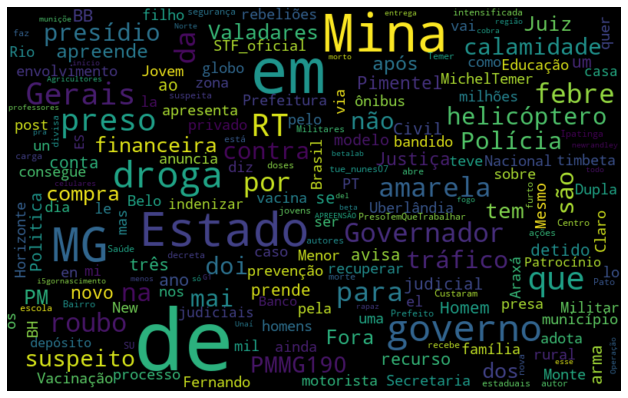

In [ ]:
plt.figure(figsize=(11,8))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()
#perceba as palavras em maior destaque na nossa word cloud
# a maioria delas nao tem nem sentido para treinarmos um modelo de classificador de textos

##Tokenizacao

In [ ]:
from nltk.tokenize import TweetTokenizer #vamos usar um tokenizador especialiado para a textos do tweeter

tweet_token = TweetTokenizer()
token = tweet_token.tokenize(palavras) #tokenizando

#analizando as palavras segmentadas com maior frequencia
frequencia = nltk.FreqDist(token)

df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequência": list(frequencia.values())})
df_frequencia.nlargest(columns = "Frequência", n = 10) 

,Palavra,Frequência
4,de,6039
68,em,2892
12,",",2108
13,Minas,1983
7,-,1755
20,e,1454
11,MG,1397
140,:,1329
26,Estado,1027
29,é,958


##Tratamentos
  - Stop Words
  - Caracteres indesejados: acentos, pontos, emojis
  - Letras maiusculas
  - Steemer

In [ ]:
#baixando espancao do pacote nlt para removermos palavras inuteis da base
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [ ]:
#removando Stop Words
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in textos.Text:
    nova_frase = list()
    palavras_texto = tweet_token.tokenize(opiniao) #agora estamos usando o token novo
    for palavra in palavras_texto:
        #verifica se a palavas segmentadas pela tokenizacao estao presentes no corpus de palavras stop word da lingua portuguesa
        if palavra not in palavras_irrelevantes:
           nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

textos['tratamento_1'] = frase_processada

In [ ]:
#retirando caracteres indesejados
from string import punctuation

#vamos precisar da tokenizacao por acentos
token_pontuacao = tokenize.WordPunctTokenizer()

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes #aqui nos juntamos com as stopwords anteriormente tratadas


#realizando o precesso semelhante
frase_processada = list()
for opiniao in textos["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao) #perceba que o tipo de tokenizacao agora é de pontuacao
    for palavra in palavras_texto:
      #verifica se a palavas segmentadas pela tokenizacao possuem pontuacao e as remove
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
textos["tratamento_2"] = frase_processada

In [ ]:
#retirando caracteres indesejados
#intalando unidecode para removermos acentos
!pip install unidecode

     |████████████████████████████████| 245kB 8.2MB/s 


In [ ]:
#retirando caracteres indesejados
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in textos["tratamento_2"]] #criando uma lista para tratamento
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

textos["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in textos["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
      #verifica se as palavras segmentadas pela tokenizacao contem acentos e os remove
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
textos["tratamento_3"] = frase_processada

In [ ]:
#removendo letras maiusculas
frase_processada = list()
for opiniao in textos["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower() #forcamos a lista a setar letras como minusculas
    palavras_texto = token_pontuacao.tokenize(opiniao) 
    for palavra in palavras_texto:
      #verifica se as palavas segmentadas pela tokenizacao estao no stopwords
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
textos["tratamento_4"] = frase_processada

In [ ]:
#reduzindo palavras ao radical comun 
stemmer = nltk.RSLPStemmer()

#realizando um processo semelhante aos anteriores
frase_processada = list()
for opiniao in textos["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra)) #agora adicionamos as palavars com radical reduzido na lista
    frase_processada.append(' '.join(nova_frase))
    
textos["tratamento_5"] = frase_processada

In [ ]:
textos.head()  #precisamos remover os links 

,Text,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,���⛪ @ Catedral de Santo Antônio - Governador ...,� � � ⛪ @ Catedral Santo Antônio - Governador ...,� � � ⛪ Catedral Santo Antônio Governador Vala...,[?] Catedral Santo Antonio Governador Valadare...,[?] catedral santo antonio governador valadare...,[?] catedr sant antoni govern valad mg
1,"� @ Governador Valadares, Minas Gerais","� @ Governador Valadares , Minas Gerais",� Governador Valadares Minas Gerais,Governador Valadares Minas Gerais,governador valadares minas gerais,govern valad min geral
2,"�� @ Governador Valadares, Minas Gerais","� � @ Governador Valadares , Minas Gerais",� � Governador Valadares Minas Gerais,Governador Valadares Minas Gerais,governador valadares minas gerais,govern valad min geral
3,���,� � �,� � �,,,
4,��� PSOL vai questionar aumento de vereadores ...,� � � PSOL vai questionar aumento vereadores p...,� � � PSOL vai questionar aumento vereadores p...,PSOL vai questionar aumento vereadores prefeit...,psol vai questionar aumento vereadores prefeit...,psol vai quest aument vere prefeit bh jus poli...


##Criando Bag of words, modelo e treinando

In [ ]:
#bag of words
vetorizar = CountVectorizer(analyzer='word')
bag_of_words = vetorizar.fit_transform(textos.tratamento_5)

bag_of_words.shape

(5765, 4985)

In [ ]:
#modelo
modelo = MultinomialNB()
modelo.fit(bag_of_words, classes)

#acentos 
acertos = (modelo.score(bag_of_words, classes)*100)

print('o modelo possui um percentual de acertos de: %.2f' %acertos + '%')

o modelo possui um percentual de acertos de: 95.54%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
